In [1]:
'''

application of calculate ocean heat budget II

'''

'\n\napplication of calculate ocean heat budget II\n\n'

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from osgeo import gdal
import xarray as xr
from scipy.io import loadmat
from scipy.interpolate import interp2d, NearestNDInterpolator

In [3]:
import os
os.getcwd()

%cd /g/data/p66/ars599/EAE_Lecture

/g/data/p66/ars599/EAE_Lecture


# Calculate horizontal advection

## 3) Grid info

In [4]:
idir = '/g/data/p66/ars599/work_eae/'
filenames = [idir+'uo_Omon_ACCESS-CM2_historical_r5i1p1f1_gn_200001-200912_v10.nc',
            idir+'vo_Omon_ACCESS-CM2_historical_r5i1p1f1_gn_200001-200912_v10.nc',
            idir+'wo_Omon_ACCESS-CM2_historical_r5i1p1f1_gn_200001-200912_v10.nc',
            idir+'thetao_Omon_ACCESS-CM2_historical_r5i1p1f1_gn_200001-200912_v10.nc']

file_list = []

for filename in filenames:
    ds = xr.open_dataset(filename)
    file_list.append(ds)

ds = file_list[0]
ds

<xarray.Dataset>
Dimensions:         (time: 120, bnds: 2, j: 99, i: 161, vertices: 4, lev: 11)
Coordinates:
  * time            (time) datetime64[ns] 2000-01-16T12:00:00 ... 2009-12-16T...
    longitude       (j, i) float64 ...
    latitude        (j, i) float64 ...
  * i               (i) float64 39.0 40.0 41.0 42.0 ... 196.0 197.0 198.0 199.0
  * j               (j) float64 87.0 88.0 89.0 90.0 ... 182.0 183.0 184.0 185.0
  * lev             (lev) float64 5.0 15.0 25.0 35.0 ... 75.0 85.0 95.0 105.0
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds       (time, bnds) datetime64[ns] ...
    longitude_bnds  (j, i, vertices) float64 ...
    latitude_bnds   (j, i, vertices) float64 ...
    lev_bnds        (lev, bnds) float64 ...
    uo              (time, lev, j, i) float32 ...
Attributes: (12/48)
    CDI:                    Climate Data Interface version 2.0.5 (https://mpi...
    source:                 ACCESS-CM2 (2019): \naerosol: UKCA-GLOMAP-mode\na...
    institution:            CSIRO (Commonwealth Scientific and Industrial Res...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    ...                     ...
    variant_label:          r5i1p1f1
    version:                v20210607
    license:                CMIP6 model data produced by CSIRO is licensed un...
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/7e3c3fb7-de8c-4efa-b274-9712d36b1cb7
    CDO:                    Climate Data Operators version 2.0.5 (https://mpi...

In [5]:
# Assuming your dataset is named ds
ds = file_list[0]

# Assuming uo is the uo variable from your xarray.Dataset (ds)
uo = ds.uo

lat_range = (-1, 1)
lon_range = (180, 185)
lev_range = (0, 10)

lon_indices = np.where((ds.longitude[0,:] >= lon_range[0]) & (ds.longitude[0,:] <= lon_range[1]))[0]
lat_indices = np.where((ds.latitude[:,0] >= lat_range[0]) & (ds.latitude[:,0] <= lat_range[1]))[0]
lev_indices = np.where((ds.lev >= lev_range[0]) & (ds.lev <= lev_range[1]))[0]

uo_lon = uo.longitude
uo_lat = uo.latitude
uo_pac = uo[:, lev_indices, lat_indices, lon_indices].mean(['lev', 'time'])
uo_lon_pac = uo_lon[lat_indices, lon_indices]
uo_lat_pac = uo_lat[lat_indices, lon_indices]


In [6]:
# Assuming your dataset is named ds
ds = file_list[1]

# Assuming vo is the vo variable from your xarray.Dataset (ds)
vo = ds.vo

lat_range = (-1, 1)
lon_range = (180, 185)
lev_range = (0, 10)

lon_indices = np.where((ds.longitude[0,:] >= lon_range[0]) & (ds.longitude[0,:] <= lon_range[1]))[0]
lat_indices = np.where((ds.latitude[:,0] >= lat_range[0]) & (ds.latitude[:,0] <= lat_range[1]))[0]
lev_indices = np.where((ds.lev >= lev_range[0]) & (ds.lev <= lev_range[1]))[0]

vo_lon = vo.longitude
vo_lat = vo.latitude
vo_pac = vo[:, lev_indices, lat_indices, lon_indices].mean(['lev', 'time'])
vo_lon_pac = vo_lon[lat_indices, lon_indices]
vo_lat_pac = vo_lat[lat_indices, lon_indices]


In [7]:
# Assuming your dataset is named ds
ds = file_list[3]

# Assuming vo is the vo variable from your xarray.Dataset (ds)
theta = ds.thetao

lat_range = (-1, 1)
lon_range = (180, 185)
lev_range = (0, 10)

lon_indices = np.where((ds.longitude[0,:] >= lon_range[0]) & (ds.longitude[0,:] <= lon_range[1]))[0]
lat_indices = np.where((ds.latitude[:,0] >= lat_range[0]) & (ds.latitude[:,0] <= lat_range[1]))[0]
lev_indices = np.where((ds.lev >= lev_range[0]) & (ds.lev <= lev_range[1]))[0]

theta_lon = theta.longitude
theta_lat = theta.latitude
theta_pac = theta[:, lev_indices, lat_indices, lon_indices].mean(['lev', 'time'])
theta_lon_pac = theta_lon[lat_indices, lon_indices]
theta_lat_pac = theta_lat[lat_indices, lon_indices]


### into latitude with depth

In [8]:
# Assuming your dataset is named ds
ds = file_list[3]

# Assuming vo is the vo variable from your xarray.Dataset (ds)
theta = ds.thetao

lat_range = (-1, 1)
lon_range = (180, 185)
lev_range = (0, 100)

lon_indices = np.where((ds.longitude[0,:] >= lon_range[0]) & (ds.longitude[0,:] <= lon_range[1]))[0]
lat_indices = np.where((ds.latitude[:,0] >= lat_range[0]) & (ds.latitude[:,0] <= lat_range[1]))[0]
lev_indices = np.where((ds.lev >= lev_range[0]) & (ds.lev <= lev_range[1]))[0]

theta_pac = theta[:, lev_indices, lat_indices, lon_indices].mean(['j', 'time'])
theta_pac

<xarray.DataArray 'thetao' (lev: 10, i: 5)>
array([[28.288857, 28.230013, 28.172995, 28.119598, 28.071417],
       [28.224072, 28.166117, 28.109491, 28.057264, 28.009592],
       [28.165638, 28.108984, 28.052347, 27.999403, 27.951572],
       [28.098246, 28.041632, 27.985506, 27.93116 , 27.883987],
       [28.007126, 27.94826 , 27.892258, 27.836302, 27.789352],
       [27.888756, 27.82886 , 27.772758, 27.715292, 27.66665 ],
       [27.740593, 27.683165, 27.627525, 27.570652, 27.5186  ],
       [27.5489  , 27.496267, 27.441479, 27.387068, 27.331491],
       [27.266138, 27.216696, 27.16567 , 27.113655, 27.056608],
       [26.824791, 26.774897, 26.721035, 26.667404, 26.605179]],
      dtype=float32)
Coordinates:
  * i        (i) float64 100.0 101.0 102.0 103.0 104.0
  * lev      (lev) float64 5.0 15.0 25.0 35.0 45.0 55.0 65.0 75.0 85.0 95.0

In [9]:
# Assuming your dataset is named ds
ds = file_list[2]

# Assuming vo is the vo variable from your xarray.Dataset (ds)
wo = ds.wo

lat_range = (-1, 1)
lon_range = (180, 185)
lev_range = (0, 110)

lon_indices = np.where((ds.longitude[0,:] >= lon_range[0]) & (ds.longitude[0,:] <= lon_range[1]))[0]
lat_indices = np.where((ds.latitude[:,0] >= lat_range[0]) & (ds.latitude[:,0] <= lat_range[1]))[0]
lev_indices = np.where((ds.lev >= lev_range[0]) & (ds.lev <= lev_range[1]))[0]

wo_pac = wo[:, lev_indices, lat_indices, lon_indices].mean(['j', 'time'])
print(wo.lev)    # array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100., 110.])
print(theta.lev) # array([  5.,  15.,  25.,  35.,  45.,  55.,  65.,  75.,  85.,  95., 105.])

<xarray.DataArray 'lev' (lev: 12)>
array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100., 110., 120.])
Coordinates:
  * lev      (lev) float64 10.0 20.0 30.0 40.0 50.0 ... 90.0 100.0 110.0 120.0
Attributes:
    standard_name:  depth
    long_name:      ocean depth coordinate
    units:          m
    positive:       down
    axis:           Z
    bounds:         lev_bnds
<xarray.DataArray 'lev' (lev: 11)>
array([  5.,  15.,  25.,  35.,  45.,  55.,  65.,  75.,  85.,  95., 105.])
Coordinates:
  * lev      (lev) float64 5.0 15.0 25.0 35.0 45.0 ... 65.0 75.0 85.0 95.0 105.0
Attributes:
    standard_name:  depth
    long_name:      ocean depth coordinate
    units:          m
    positive:       down
    axis:           Z
    bounds:         lev_bnds


## 6) Calculate and plot the spatial maps of both of these advection terms in the upper layer 

In [10]:
def calculate_n3_anom(var, ystart, ylast):
    ystart_str = str(ystart).zfill(4)
    ylast_str = str(ylast).zfill(4)
    var = var.sel(time=slice(ystart_str, ylast_str))
    var_clim = var.groupby("time.month").mean(dim="time")
    var_anom = var.groupby("time.month") - var_clim
    return var_anom

In [11]:
# Assuming uo is the zonal current variable from your xarray.Dataset (ds)
print("................0....................")
print(np.shape(uo)) # (time: 120, lev: 11, j: 99, i: 161)
print(np.shape(vo)) # (time: 120, lev: 11, j: 99, i: 161)
print(np.shape(wo)) # (time: 120, lev: 11, j: 98, i: 160)

# this might not be a good method !!
# adjust uo vo lev to wo lev
# hold first !!
#uo = uo.assign_coords(lev=wo.lev)
#vo = vo.assign_coords(lev=wo.lev)

uo_anom = calculate_n3_anom(uo,2000,2009)
vo_anom = calculate_n3_anom(vo,2000,2009)
#wo_anom = calculate_n3_anom(wo,2000,2009)
theta_anom = calculate_n3_anom(theta,2000,2009)

uo_bar = uo - uo_anom
vo_bar = vo - vo_anom
#wo_bar = wo - wo_anom
theta_bar = theta - theta_anom

print("................1....................")
print(uo.lev.values)
print(vo.lev.values)

# test if clim = raw - anomaly
print("................2....................")
print(theta_bar[8,4,48,78].values,  theta[8,4,48,78].values,  theta_anom[8,4,48,78].values)


................0....................
(120, 11, 99, 161)
(120, 11, 99, 161)
(120, 12, 98, 160)
................1....................
[  5.  15.  25.  35.  45.  55.  65.  75.  85.  95. 105.]
[  5.  15.  25.  35.  45.  55.  65.  75.  85.  95. 105.]
................2....................
26.847012 27.1125545501709 0.26554298


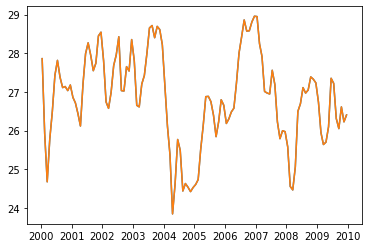

In [12]:
plt.plot(theta.time,theta_bar[:,4,48,78]+theta_anom[:,4,48,78],
        theta.time,theta[:,4,48,78])

In [13]:
# Calculate the gradient of velocity with respect to longitude
dT_dt = theta.differentiate('time')  # First-order difference along the longitude dimension
dT_dlon = theta.differentiate('i')  # First-order difference along the longitude dimension
dT_dlat = theta.differentiate('j')  # First-order difference along the latidue dimension
dT_dlev = theta.differentiate('lev')  # First-order difference along the latidue dimension

dTa_dlon = theta_anom.differentiate('i')  # First-order difference along the longitude dimension
dTa_dlat = theta_anom.differentiate('j')  # First-order difference along the latidue dimension
dTa_dlev = theta_anom.differentiate('lev')  # First-order difference along the latidue dimension

dTb_dlon = theta_bar.differentiate('i')  # First-order difference along the longitude dimension
dTb_dlat = theta_bar.differentiate('j')  # First-order difference along the latidue dimension
dTb_dlev = theta_bar.differentiate('lev')  # First-order difference along the latidue dimension

print("................0....................")
print("dT_dt shape:", dT_dt.shape)  # Output: dT_dt shape: (time: 120, lev: 11, j: 98, i: 160)
print(np.shape(dTb_dlat)) # (time: 120, lev: 11, j: 98, i: 160)
print(np.shape(dTb_dlon)) # (time: 120, lev: 11, j: 98, i: 160)
print(np.shape(dTb_dlev)) # (time: 120, lev: 11, j: 98, i: 160)

print("................1....................")
print(dT_dlev.lev.values)
print(dTa_dlev.lev.values)
print(dTb_dlev.lev.values)

print(dT_dlon.lev.values)
print(dTa_dlon.lev.values)
print(dTb_dlon.lev.values)

print(dT_dlat.lev.values)
print(dTa_dlat.lev.values)
print(dTb_dlat.lev.values)


................0....................
dT_dt shape: (120, 11, 98, 160)
(120, 11, 98, 160)
(120, 11, 98, 160)
(120, 11, 98, 160)
................1....................
[  5.  15.  25.  35.  45.  55.  65.  75.  85.  95. 105.]
[  5.  15.  25.  35.  45.  55.  65.  75.  85.  95. 105.]
[  5.  15.  25.  35.  45.  55.  65.  75.  85.  95. 105.]
[  5.  15.  25.  35.  45.  55.  65.  75.  85.  95. 105.]
[  5.  15.  25.  35.  45.  55.  65.  75.  85.  95. 105.]
[  5.  15.  25.  35.  45.  55.  65.  75.  85.  95. 105.]
[  5.  15.  25.  35.  45.  55.  65.  75.  85.  95. 105.]
[  5.  15.  25.  35.  45.  55.  65.  75.  85.  95. 105.]
[  5.  15.  25.  35.  45.  55.  65.  75.  85.  95. 105.]


In [14]:
'''
https://github.com/Unidata/python-gallery/blob/master/examples/Differential_Temperature_Advection.py
'''
# import metpy.calc as mpcalc


'\nhttps://github.com/Unidata/python-gallery/blob/master/examples/Differential_Temperature_Advection.py\n'

In [15]:
# Calculate zonal advection by multiplying gradient with uo
zonal_advection = dT_dlon * uo
TbUb = dTb_dlon * uo_bar
TaUb = dTa_dlon * uo_bar
TbUa = dTb_dlon * uo_anom
TaUa = dTa_dlon * uo_anom

meridional_advection = dT_dlat * vo
TbVb = dTb_dlat * vo_bar
TaVb = dTa_dlat * vo_bar
TbVa = dTb_dlat * vo_anom
TaVa = dTa_dlat * vo_anom


................2....................
-0.065971375 -0.43681907653808594 -0.04309845 -0.6350075 -0.022872925 -0.6350075 -0.04309845 0.19818842 -0.022872925 0.19818842
.....2a.......
0.02881755510544777
.....2b.......
0.027367838988375
0.014524478921937497
-0.008541613709949
-0.0045331488665285
.....2c.......
0.028817555333835


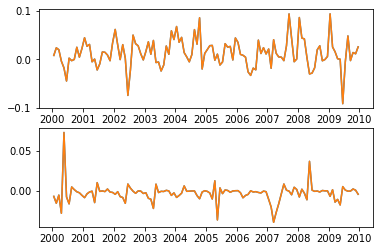

In [16]:
# test if UdTdx_all = UdTdx + UdT'dx + U'dTdx + U'dT'dx
print("................2....................")
print(dT_dlon[13,4,48,78].values,  uo[13,4,48,78].values,
     dTb_dlon[13,4,48,78].values,  uo_bar[13,4,48,78].values,
     dTa_dlon[13,4,48,78].values,  uo_bar[13,4,48,78].values,
     dTb_dlon[13,4,48,78].values,  uo_anom[13,4,48,78].values,
     dTa_dlon[13,4,48,78].values,  uo_anom[13,4,48,78].values)
print(".....2a.......")
print(-0.065971375*
      -0.43681907653808594)
print(".....2b.......")
print( -0.04309845* -0.6350075)
print( -0.022872925* -0.6350075)
print( -0.04309845* 0.19818842)
print( -0.022872925* 0.19818842)
print(".....2c.......")
print(0.027367838988375
+ 0.014524478921937497
+ -0.008541613709949
+ -0.0045331488665285)

plt.subplot(211)
plt.plot(zonal_advection.time, zonal_advection[:,4,48,78],
    zonal_advection.time, TbUb[:,4,48,78]
                        +TaUb[:,4,48,78]
                        +TbUa[:,4,48,78]
                        +TaUa[:,4,48,78])
plt.subplot(212)
plt.plot(meridional_advection.time, meridional_advection[:,4,48,78],
    meridional_advection.time, TbVb[:,4,48,78]
                            +TaVb[:,4,48,78]
                            +TbVa[:,4,48,78]
                            +TaVa[:,4,48,78])

[ 10.  20.  30.  40.  50.  60.  70.  80.  90. 100. 110. 120.]
[  5.  15.  25.  35.  45.  55.  65.  75.  85.  95. 105.]
(120, 12, 98, 160)
[  5.  15.  25.  35.  45.  55.  65.  75.  85.  95. 105.]


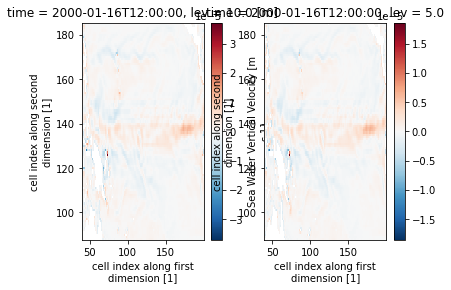

In [17]:
'''
Prepare W to fit T vertical grid !!!!

'''

from scipy.interpolate import interp1d
# Assuming T is on grid [5., 15., 25., ..., 105.] and W is on grid [10., 20., 30., ..., 120.]
# Interpolate W to the grid of T
W_levels = wo.lev.values
T_levels = theta.lev.values

print(W_levels)
print(T_levels)
print(wo.shape)

# Create fake data at depth 0
fake_data_at_0 = wo.isel(lev=0) * 0.5  # You can adjust the factor as needed

# Interpolate to target depths
wo_interp = interp1d(W_levels, wo, axis=1, kind='linear', bounds_error=False)(T_levels)
# Create a new DataArray with interpolated values and coordinates
wo_interp_da = xr.DataArray(wo_interp, coords={'latitude': wo.latitude, 'longitude': wo.longitude, 'i': wo.i, 'j': wo.j, 'time': wo.time, 'lev': T_levels}, dims=('time', 'lev', 'j', 'i'))
wo_interp_da[:,0,:,:] = fake_data_at_0

plt.subplot(121)
wo[0,0].plot()
plt.subplot(122)
wo_interp_da[0,0].plot()

print(wo_interp_da.lev.values)

................1....................
[  5.  15.  25.  35.  45.  55.  65.  75.  85.  95. 105.]
[  5.  15.  25.  35.  45.  55.  65.  75.  85.  95. 105.]
[  5.  15.  25.  35.  45.  55.  65.  75.  85.  95. 105.]
................2....................
[  5.  15.  25.  35.  45.  55.  65.  75.  85.  95. 105.]
[  5.  15.  25.  35.  45.  55.  65.  75.  85.  95. 105.]
[  5.  15.  25.  35.  45.  55.  65.  75.  85.  95. 105.]
................3....................
[  5.  15.  25.  35.  45.  55.  65.  75.  85.  95. 105.]
[  5.  15.  25.  35.  45.  55.  65.  75.  85.  95. 105.]
[  5.  15.  25.  35.  45.  55.  65.  75.  85.  95. 105.]
[  5.  15.  25.  35.  45.  55.  65.  75.  85.  95. 105.]


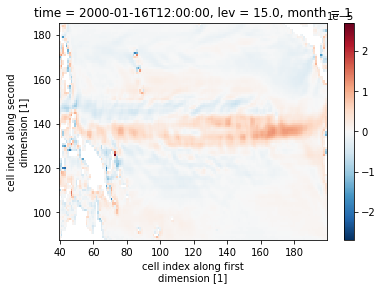

In [18]:
wo_anom = calculate_n3_anom(wo_interp_da,2000,2009)
wo_bar = wo_interp - wo_anom
wo_bar[0,1].plot()

# Now w_interp has the same vertical grid as T, and you can multiply dT_dlev with w_interp
vertical_advection = dT_dlev * wo_interp_da
TbWb = dTb_dlev * wo_bar
TaWb = dTa_dlev * wo_bar
TbWa = dTb_dlev * wo_anom
TaWa = dTa_dlev * wo_anom

print("................1....................")
print(zonal_advection.lev.values)
print(dT_dlon .lev.values)
print(uo.lev.values)
print("................2....................")
print(meridional_advection.lev.values)
print(dT_dlev.lev.values)
print(vo.lev.values)
print("................3....................")
print(dTa_dlev.lev.values)
print(wo_bar.lev.values)
print(dTb_dlev.lev.values)
print(wo_anom.lev.values)

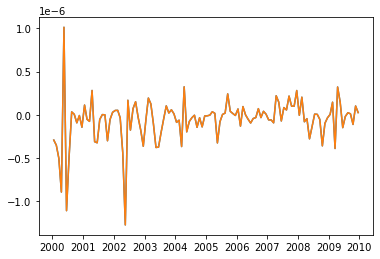

In [19]:
plt.plot(vertical_advection.time, vertical_advection[:,4,48,78],
    vertical_advection.time, TbWb[:,4,48,78]
                            +TaWb[:,4,48,78]
                            +TbWa[:,4,48,78]
                            +TaWa[:,4,48,78])

[  5.  15.  25.  35.  45.  55.  65.  75.  85.  95. 105.]
[  5.  15.  25.  35.  45.  55.  65.  75.  85.  95. 105.]


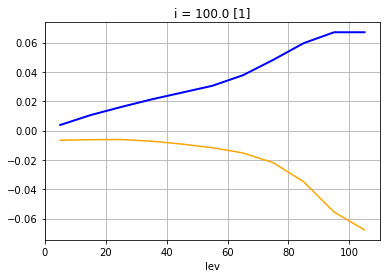

In [20]:
dT_dlev.latitude[:,0]
lat_range = (0, 1)
lon_range = (180, 181)
lev_range = (0, 110)

lon_indices = np.where((dT_dlev.longitude[0,:] >= lon_range[0]) & (dT_dlev.longitude[0,:] <= lon_range[1]))[0]
lat_indices = np.where((dT_dlev.latitude[:,0] >= lat_range[0]) & (dT_dlev.latitude[:,0] <= lat_range[1]))[0]
lev_indices = np.where((dT_dlev.lev >= lev_range[0]) & (dT_dlev.lev <= lev_range[1]))[0]
dT_dlev_dot = dT_dlev[:, lev_indices, lat_indices, lon_indices].mean(['j','time'])

lon_indices = np.where((wo_interp_da.longitude[0,:] >= lon_range[0]) & (wo_interp_da.longitude[0,:] <= lon_range[1]))[0]
lat_indices = np.where((wo_interp_da.latitude[:,0] >= lat_range[0]) & (wo_interp_da.latitude[:,0] <= lat_range[1]))[0]
lev_indices = np.where((wo_interp_da.lev >= lev_range[0]) & (wo_interp_da.lev <= lev_range[1]))[0]
wo_dot = wo_interp_da[:, lev_indices, lat_indices, lon_indices].mean(['j','time']) * 1e4

dT_dlev_dot.plot(c='orange')
wo_dot.plot(color='blue', linewidth=2) # [  5.  15.  25.  35.  45.  55.  65.  75.  85.  95. 105.]
plt.grid()

'''
so actually we lose first level of w !!!

'''
print(dT_dlev.lev.values)
print(wo_dot.lev.values)


In [22]:
# Create a zonal advection Dataset containing the DataArrays
data_dict = {
    'dT_dt' : dT_dt,
    'zonal_advection': zonal_advection,
    'TbUb': TbUb,
    'TaUb': TaUb,
    'TbUa': TbUa,
    'TaUa': TaUa,
    'meridional_advection': meridional_advection,
    'TbVb': TbVb,
    'TaVb': TaVb,
    'TbVa': TbVa,
    'TaVa': TaVa,
    'vertical_advection': vertical_advection,
    'TbWb': TbWb,
    'TaWb': TaWb,
    'TbWa': TbWa,
    'TaWa': TaWa
}
ds = xr.Dataset(data_dict)

# Save the Dataset to a netCDF file
ds.to_netcdf('temperature_tendency.nc')

In [ ]:
'''
now skip this one
'''
# Create a zonal advection Dataset containing the DataArrays
data_dict = {
    'zonal_advection': zonal_advection,
    'TbUb': TbUb,
    'TaUb': TaUb,
    'TbUa': TbUa,
    'TaUa': TaUa
}
ds = xr.Dataset(data_dict)

# Save the Dataset to a netCDF file
ds.to_netcdf('zonal_advection_and_terms.nc')

# Create a meridional advection Dataset containing the DataArrays
data_dict = {
    'meridional_advection': meridional_advection,
    'TbVb': TbVb,
    'TaVb': TaVb,
    'TbVa': TbVa,
    'TaVa': TaVa
}
ds = xr.Dataset(data_dict)

# Save the Dataset to a netCDF file
ds.to_netcdf('meridional_advection_and_terms.nc')

# Create a vertical advection Dataset containing the DataArrays
data_dict = {
    'vertical_advection': vertical_advection,
    'TbWb': TbWb,
    'TaWb': TaWb,
    'TbWa': TbWa,
    'TaWa': TaWa
}
ds = xr.Dataset(data_dict)

# Save the Dataset to a netCDF file
ds.to_netcdf('vertical_advection_and_terms.nc')

# 2D plot to make sure all four terms equal to the RHS

## 7) Using a set mixed layer depth of 50m (the upper 5 layers of CM2 output) and a grid point of your choice, calculate the zonal/meridional advection of temperature into the west face of that point? [ present this as a time series] 

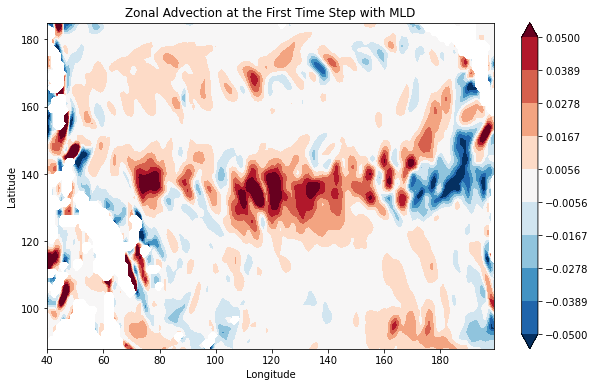

In [23]:
# Select zonal advection data for the first time step and first vertical level
depth_range = slice(0, 50)  # Depth range from 0 to 50 meters

# Select data within the depth range and calculate the mean along the depth dimension
zonal_advection_first_step = zonal_advection.isel(time=0)
zonal_advection_average_50m = zonal_advection_first_step.sel(lev=depth_range)[0] #.mean(dim='lev')

# Create a contour plot
plt.figure(figsize=(10, 6))
contour = zonal_advection_average_50m.plot.contourf(levels=10, cmap='RdBu_r', extend='both', vmin=-.05, vmax=.05)
plt.title('Zonal Advection at the First Time Step with MLD')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

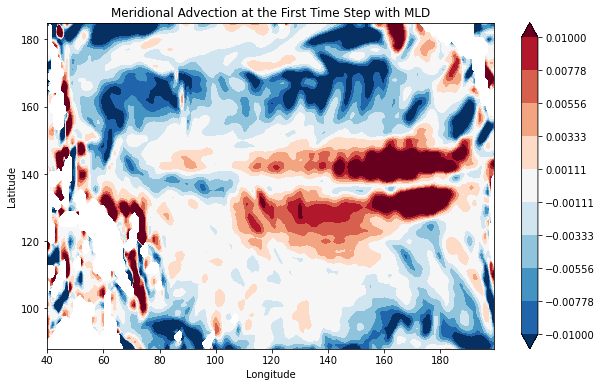

In [24]:
# Select zonal advection data for the first time step and first vertical level
depth_range = slice(0, 50)  # Depth range from 0 to 50 meters

# Select data within the depth range and calculate the mean along the depth dimension
meridional_advection_first_step = meridional_advection.isel(time=0)
meridional_advection_average_50m = meridional_advection_first_step.sel(lev=depth_range)[0] #.mean(dim='lev')

# Create a contour plot
plt.figure(figsize=(10, 6))
contour = meridional_advection_average_50m.plot.contourf(levels=10, cmap='RdBu_r', extend='both',vmin=-.01,vmax=.01)
plt.title('Meridional Advection at the First Time Step with MLD')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

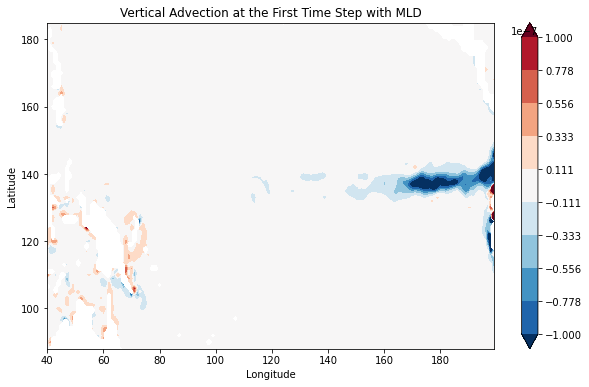

In [25]:
# Select zonal advection data for the first time step and first vertical level
depth_range = slice(0, 50)  # Depth range from 0 to 50 meters

# Select data within the depth range and calculate the mean along the depth dimension
vertical_advection_first_step = vertical_advection.isel(time=0)
vertical_advection_average_50m = vertical_advection_first_step.sel(lev=depth_range)[0] #.mean(dim='lev')

# Create a contour plot
plt.figure(figsize=(10, 6))
contour = vertical_advection_average_50m.plot.contourf(levels=10, cmap='RdBu_r', extend='both',vmin=-1e-7,vmax=1e-7)
plt.title('Vertical Advection at the First Time Step with MLD')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

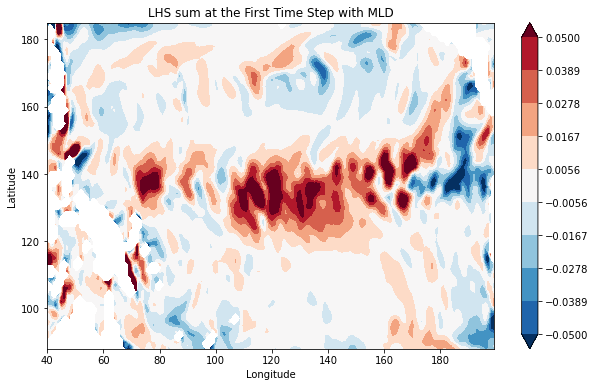

In [26]:
lhs_50m_sum = zonal_advection_average_50m+meridional_advection_average_50m+vertical_advection_average_50m
# Create a contour plot
plt.figure(figsize=(10, 6))
contour = lhs_50m_sum.plot.contourf(levels=10, cmap='RdBu_r', extend='both',vmin=-5e-2,vmax=5e-2)
plt.title('LHS sum at the First Time Step with MLD')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

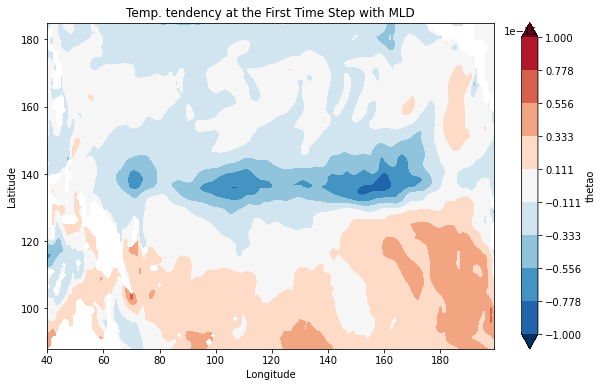

In [27]:
# Select zonal advection data for the first time step and first vertical level
depth_range = slice(0, 50)  # Depth range from 0 to 50 meters

# Select data within the depth range and calculate the mean along the depth dimension
dT_dt_first_step = dT_dt.isel(time=0)
dT_dt_average_50m = dT_dt_first_step.sel(lev=depth_range)[0] #.mean(dim='lev')

# Create a contour plot
plt.figure(figsize=(10, 6))
contour = dT_dt_average_50m.plot.contourf(levels=10, cmap='RdBu_r', extend='both',vmin=-1e-15,vmax=1e-15)
plt.title('Temp. tendency at the First Time Step with MLD')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [28]:
rhs = zonal_advection+meridional_advection+vertical_advection

# Create a contour plot
#plt.figure(figsize=(10, 6))
#contour = dT_dt_average_50m.plot.contourf(levels=10, cmap='RdBu_r', extend='both',vmin=-1e-15,vmax=1e-15)
#plt.title('Temp. tendency at the First Time Step with MLD')
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')
#plt.show()

print(zonal_advection.shape)
print(meridional_advection.shape)
print(vertical_advection.shape)

print(zonal_advection.lev.values)
print(meridional_advection.lev.values)
print(vertical_advection.lev.values)


(120, 11, 98, 160)
(120, 11, 98, 160)
(120, 11, 98, 160)
[  5.  15.  25.  35.  45.  55.  65.  75.  85.  95. 105.]
[  5.  15.  25.  35.  45.  55.  65.  75.  85.  95. 105.]
[  5.  15.  25.  35.  45.  55.  65.  75.  85.  95. 105.]


## Results: (1) checking: Time series

In [29]:
'''
08162023: ars599
should add this back and replace
dT_dlev * wo  to
dT_dlev * wo_interp_da
due to T'z -> maybe change to wo level ??

'''


depth_range = slice(0, 50)  # Depth range from 0 to 50 meters
zonal_advection_average_50m_ts = zonal_advection.sel(lev=depth_range).mean(dim='lev').mean(dim=['i', 'j'])
meridional_advection_average_50m_ts = meridional_advection.sel(lev=depth_range).mean(dim='lev').mean(dim=['i', 'j'])
##### delete this address above already !!!    vertical_advection = dT_dlev * wo_interp_da
vertical_advection_average_50m_ts = vertical_advection.sel(lev=depth_range).mean(dim='lev').mean(dim=['i', 'j'])

TbUb_average_50m_ts = TbUb.sel(lev=depth_range).mean(dim='lev').mean(dim=['i', 'j'])
TbVb_average_50m_ts = TbVb.sel(lev=depth_range).mean(dim='lev').mean(dim=['i', 'j'])

TaUb_average_50m_ts = TaUb.sel(lev=depth_range).mean(dim='lev').mean(dim=['i', 'j'])
TaVb_average_50m_ts = TaVb.sel(lev=depth_range).mean(dim='lev').mean(dim=['i', 'j'])

TbUa_average_50m_ts = TbUa.sel(lev=depth_range).mean(dim='lev').mean(dim=['i', 'j'])
TbVa_average_50m_ts = TbVa.sel(lev=depth_range).mean(dim='lev').mean(dim=['i', 'j'])

TaUa_average_50m_ts = TaUa.sel(lev=depth_range).mean(dim='lev').mean(dim=['i', 'j'])
TaVa_average_50m_ts = TaVa.sel(lev=depth_range).mean(dim='lev').mean(dim=['i', 'j'])


TbWb_average_50m_ts = TbWb.sel(lev=depth_range).mean(dim='lev').mean(dim=['i', 'j'])
TaWb_average_50m_ts = TaWb.sel(lev=depth_range).mean(dim='lev').mean(dim=['i', 'j'])
TbWa_average_50m_ts = TbWa.sel(lev=depth_range).mean(dim='lev').mean(dim=['i', 'j'])
TaWa_average_50m_ts = TaWa.sel(lev=depth_range).mean(dim='lev').mean(dim=['i', 'j'])


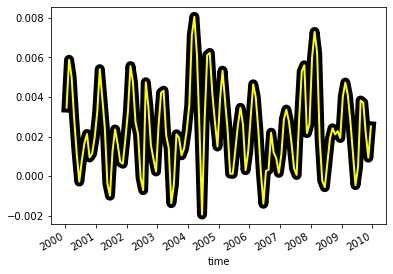

In [30]:
zonal_advection_average_50m_ts.plot(linewidth=10,c='k')
zonal_sum = TbUb_average_50m_ts + TaUb_average_50m_ts + TbUa_average_50m_ts + TaUa_average_50m_ts
zonal_sum.plot(linewidth=2,c='yellow')
plt.savefig("UdTdx_all.png",dpi=300)

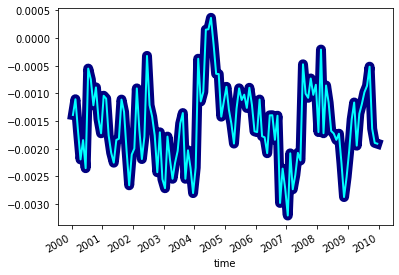

In [31]:
meridional_advection_average_50m_ts.plot(linewidth=10,c='navy')
meridional_sum = TbVb_average_50m_ts + TaVb_average_50m_ts + TbVa_average_50m_ts + TaVa_average_50m_ts
meridional_sum.plot(linewidth=2,c='aqua')
plt.savefig("VdTdy_all.png",dpi=300)

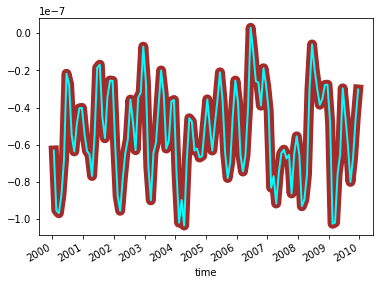

In [32]:
vertical_advection_average_50m_ts.plot(linewidth=10,c='brown')
vertical_sum = TbWb_average_50m_ts + TaWb_average_50m_ts + TbWa_average_50m_ts + TaWa_average_50m_ts
vertical_sum.plot(linewidth=2,c='aqua')

### Results: (2) checking in 2D first time first level

In [33]:
depth_range = slice(5, 5)  # Depth range from 0 to 50 meters
zonal_advection_average_surf = zonal_advection.sel(lev=depth_range)

TbUb_average_surf = TbUb.sel(lev=depth_range)
TaUb_average_surf = TaUb.sel(lev=depth_range)
TbUa_average_surf = TbUa.sel(lev=depth_range)
TaUa_average_surf = TaUa.sel(lev=depth_range)


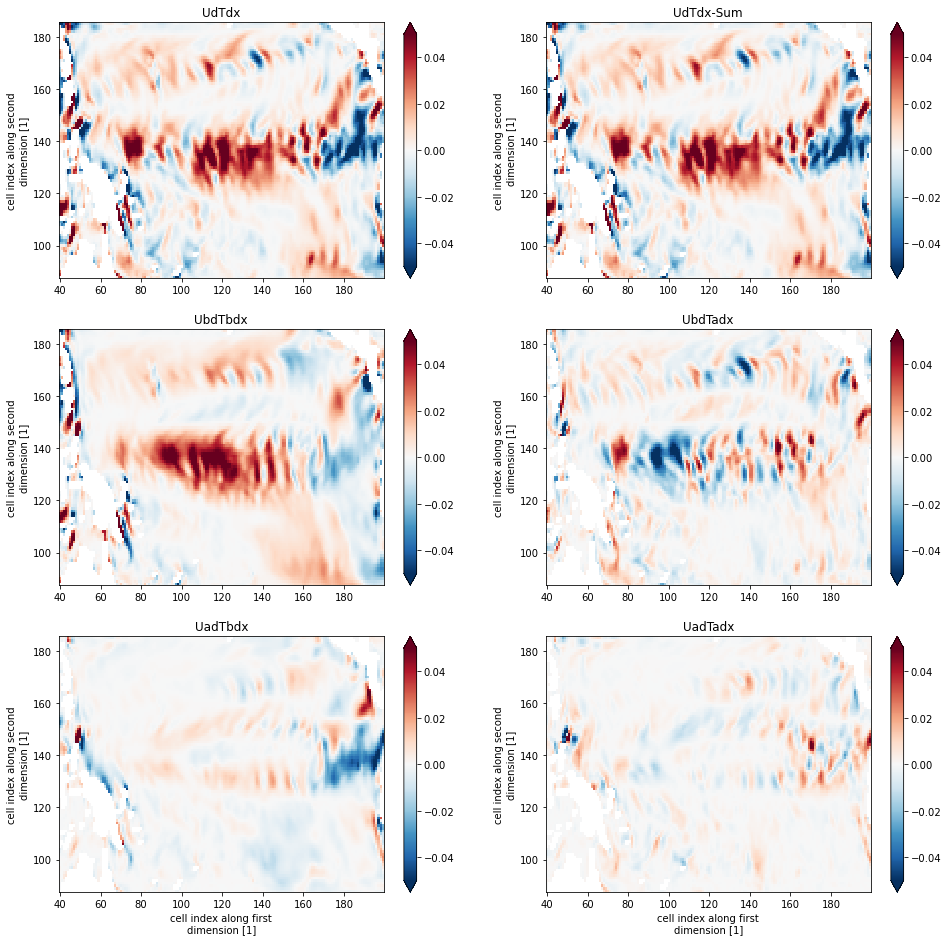

In [34]:

zona_advection_sum_surf = TbUb_average_surf+TaUb_average_surf+TbUa_average_surf+TaUa_average_surf

plt.figure(figsize=(16, 16))
plt.subplot(321)
zonal_advection_average_surf[0].plot(cmap='RdBu_r', vmin=-.05, vmax=.05)
plt.title('UdTdx');plt.xlabel('')
plt.subplot(322)
zona_advection_sum_surf[0].plot(cmap='RdBu_r', vmin=-.05, vmax=.05)
plt.title('UdTdx-Sum');plt.xlabel('')
plt.subplot(323)
TbUb_average_surf[0].plot(cmap='RdBu_r', vmin=-.05, vmax=.05)
plt.title('UbdTbdx');plt.xlabel('')
plt.subplot(324)
TaUb_average_surf[0].plot(cmap='RdBu_r', vmin=-.05, vmax=.05)
plt.title('UbdTadx');plt.xlabel('')

plt.subplot(325)
TbUa_average_surf[0].plot(cmap='RdBu_r', vmin=-.05, vmax=.05)
plt.title('UadTbdx')
plt.subplot(326)
TaUa_average_surf[0].plot(cmap='RdBu_r', vmin=-.05, vmax=.05)
plt.title('UadTadx')

plt.savefig("UdTdx_2D_panels.png",dpi=300)

In [35]:
meridional_advection_average_surf = meridional_advection.sel(lev=depth_range)

TbVb_average_surf = TbVb.sel(lev=depth_range)
TaVb_average_surf = TaVb.sel(lev=depth_range)
TbVa_average_surf = TbVa.sel(lev=depth_range)
TaVa_average_surf = TaVa.sel(lev=depth_range)


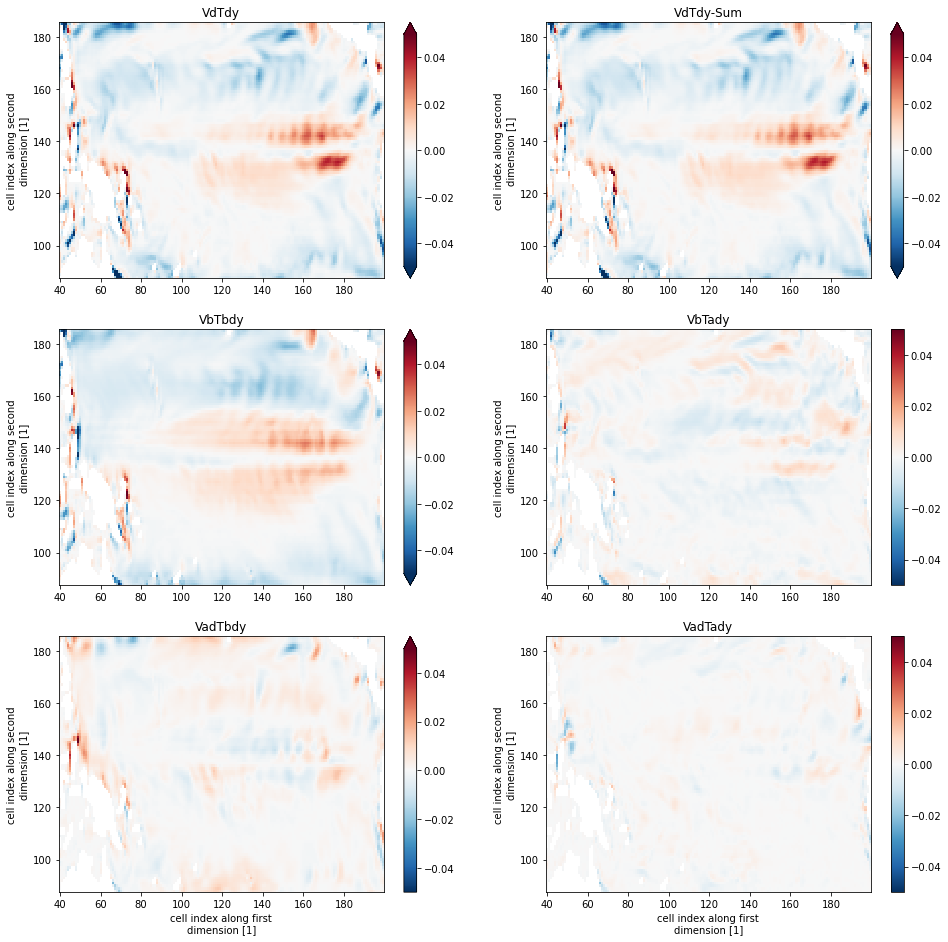

In [36]:

meri_advection_sum_surf = TbVb_average_surf+TaVb_average_surf+TbVa_average_surf+TaVa_average_surf

plt.figure(figsize=(16, 16))
plt.subplot(321)
meridional_advection_average_surf[0].plot(cmap='RdBu_r', vmin=-.05, vmax=.05)
plt.title('VdTdy');plt.xlabel('')
plt.subplot(322)
meri_advection_sum_surf[0].plot(cmap='RdBu_r', vmin=-.05, vmax=.05)
plt.title('VdTdy-Sum');plt.xlabel('')
plt.subplot(323)
TbVb_average_surf[0].plot(cmap='RdBu_r', vmin=-.05, vmax=.05)
plt.title('VbTbdy');plt.xlabel('')
plt.subplot(324)
TaVb_average_surf[0].plot(cmap='RdBu_r', vmin=-.05, vmax=.05)
plt.title('VbTady');plt.xlabel('')

plt.subplot(325)
TbVa_average_surf[0].plot(cmap='RdBu_r', vmin=-.05, vmax=.05)
plt.title('VadTbdy')
plt.subplot(326)
TaVa_average_surf[0].plot(cmap='RdBu_r', vmin=-.05, vmax=.05)
plt.title('VadTady')

plt.savefig("VdTdy_2D_panels.png",dpi=300)

In [37]:
vertical_advection_average_surf = vertical_advection.sel(lev=depth_range)

TbWb_average_surf = TbWb.sel(lev=depth_range)
TaWb_average_surf = TaWb.sel(lev=depth_range)
TbWa_average_surf = TbWa.sel(lev=depth_range)
TaWa_average_surf = TaWa.sel(lev=depth_range)


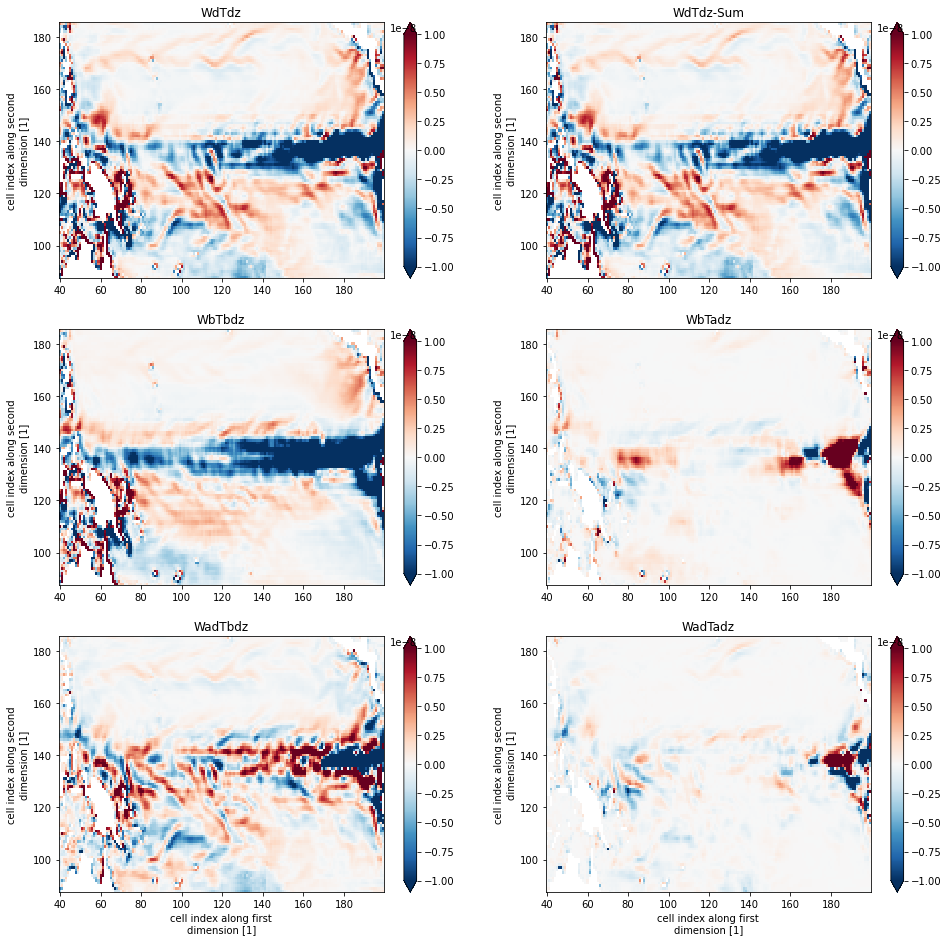

In [38]:

vert_advection_sum_surf = TbWb_average_surf+TaWb_average_surf+TbWa_average_surf+TaWa_average_surf

plt.figure(figsize=(16, 16))
plt.subplot(321)
vertical_advection_average_surf[0].plot(cmap='RdBu_r', vmin=-1e-8,vmax=1e-8)
plt.title('WdTdz');plt.xlabel('')
plt.subplot(322)
vert_advection_sum_surf[0].plot(cmap='RdBu_r', vmin=-1e-8,vmax=1e-8)
plt.title('WdTdz-Sum');plt.xlabel('')
plt.subplot(323)
TbWb_average_surf[0].plot(cmap='RdBu_r', vmin=-1e-8,vmax=1e-8)
plt.title('WbTbdz');plt.xlabel('')
plt.subplot(324)
TaWb_average_surf[0].plot(cmap='RdBu_r', vmin=-1e-8,vmax=1e-8)
plt.title('WbTadz');plt.xlabel('')

plt.subplot(325)
TbWa_average_surf[0].plot(cmap='RdBu_r', vmin=-1e-8,vmax=1e-8)
plt.title('WadTbdz')
plt.subplot(326)
TaWa_average_surf[0].plot(cmap='RdBu_r', vmin=-1e-8,vmax=1e-8)
plt.title('WadTadz')

plt.savefig("WdTdz_2D_panels.png",dpi=300)

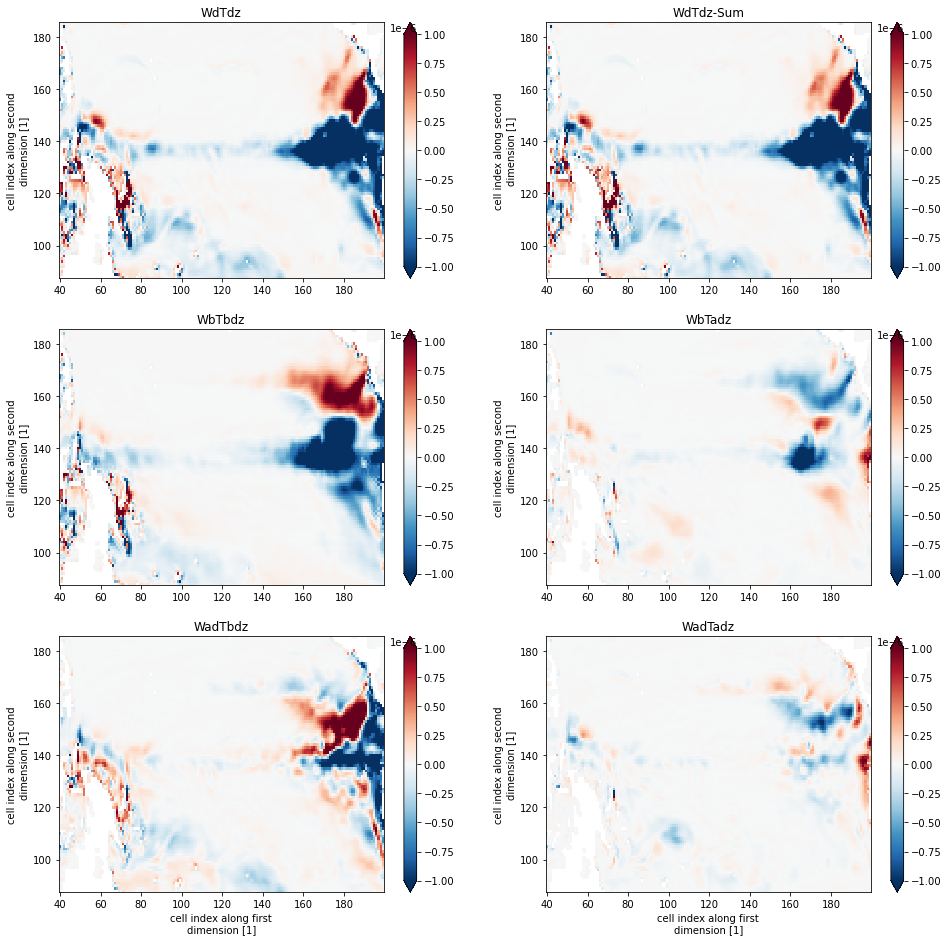

In [39]:
'''
at 50 meters
'''
depth_range50 = slice(45, 45)  # Depth range from 0 to 50 meters
vertical_advection_average_surf = vertical_advection.sel(lev=depth_range50)

TbWb_average_surf = TbWb.sel(lev=depth_range50)
TaWb_average_surf = TaWb.sel(lev=depth_range50)
TbWa_average_surf = TbWa.sel(lev=depth_range50)
TaWa_average_surf = TaWa.sel(lev=depth_range50)

# ======================================================================
vert_advection_sum_surf = TbWb_average_surf+TaWb_average_surf+TbWa_average_surf+TaWa_average_surf

plt.figure(figsize=(16, 16))
plt.subplot(321)
vertical_advection_average_surf[0].plot(cmap='RdBu_r', vmin=-1e-6,vmax=1e-6)
plt.title('WdTdz');plt.xlabel('')
plt.subplot(322)
vert_advection_sum_surf[0].plot(cmap='RdBu_r', vmin=-1e-6,vmax=1e-6)
plt.title('WdTdz-Sum');plt.xlabel('')
plt.subplot(323)
TbWb_average_surf[0].plot(cmap='RdBu_r', vmin=-1e-6,vmax=1e-6)
plt.title('WbTbdz');plt.xlabel('')
plt.subplot(324)
TaWb_average_surf[0].plot(cmap='RdBu_r', vmin=-1e-6,vmax=1e-6)
plt.title('WbTadz');plt.xlabel('')

plt.subplot(325)
TbWa_average_surf[0].plot(cmap='RdBu_r', vmin=-1e-6,vmax=1e-6)
plt.title('WadTbdz')
plt.subplot(326)
TaWa_average_surf[0].plot(cmap='RdBu_r', vmin=-1e-6,vmax=1e-6)
plt.title('WadTadz')

plt.savefig("WdTdz_2D_50m_panels.png",dpi=300)